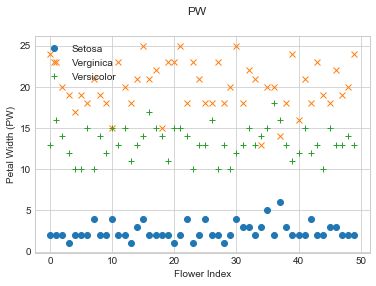

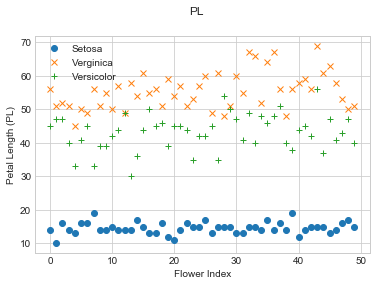

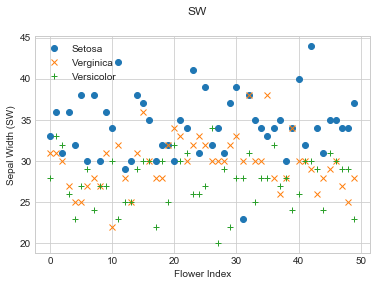

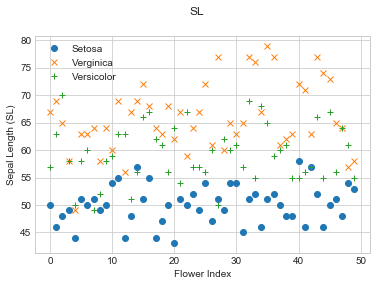

In [2]:
import csv
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')


with open("Fisher.txt") as f:
    content = f.readlines()

titles = content[0].split()
lines = [line.split() for line in content[1:]]

type0 = np.array([[int(flower[1]), int(flower[2]), int(flower[3]), int(flower[4])] for flower in lines if flower[0] is '0'])
type1 = np.array([[int(flower[1]), int(flower[2]), int(flower[3]), int(flower[4])] for flower in lines if flower[0] is '1'])
type2 = np.array([[int(flower[1]), int(flower[2]), int(flower[3]), int(flower[4])] for flower in lines if flower[0] is '2'])
ylabels = ['Petal Width (PW)', 'Petal Length (PL)', 'Sepal Width (SW)', 'Sepal Length (SL)']

for i in range(len(ylabels)):
    fig, ax = plt.subplots()
    ax.plot(range(len(type0)), type0[:,i], 'o', label="Setosa")
    ax.plot(range(len(type1)), type1[:,i], 'x', label="Verginica")
    ax.plot(range(len(type2)), type2[:,i], '+', label="Versicolor")
    ax.set_xlabel('Flower Index')
    ax.set_ylabel(ylabels[i])
    fig.suptitle(ylabels[i][-3:-1])
    ax.legend(numpoints=1)
    plt.savefig('Plot%d.png'%i)

In [12]:
# Containers for Decision Stump Predictions
pred_PW=[]
pred_PL=[]
pred_SW=[]
pred_SL=[]

# Containers for Decision Stump Accuracy Tests
accu_PW = []
accu_PL=[]
accu_SW=[]
accu_SL=[]

# Separate the columns in the text file. Separate the feature data and the labels
classes=np.array([[int(y_train[0])] for y_train in lines]) 
PW=np.array([[int(p_width[1])] for p_width in lines])
PL =np.array([[int(p_length[2])] for p_length in lines])
SW = np.array([[int(s_width[3])] for s_width in lines])
SL=np.array([[int(s_length[4])] for s_length in lines])

# Decision stump for Petal Width Feature
# Threshold values used: Setosa, Sepal Length less than 8
#                        Verginica, Sepal Length greater than 8 but less then or equal to 16
#                        Versicolor, Sepal Length greater than 16
for j in range(len(PW)):
    if(int(PW[j])<8):
        pred_PW=np.append(pred_PW,0)
    elif(int(PW[j])>8 and int(PW[j])<=16):
        pred_PW=np.append(pred_PW,2)
    elif(int(PW[j])>16):
        pred_PW=np.append(pred_PW,1)
#Test for accuracy with Decision Stump with Petal Width        
for test in range(len(classes)):
    if (int(pred_PW[test]) is int(classes[test])):
        accu_PW=np.append(accu_PW,1)
    else:
        accu_PW=np.append(accu_PW,0)
        
# Decision stump for Petal Length Feature
# Threshold values used: Setosa, Sepal Length less than 25
#                        Verginica, Sepal Length greater than or equal to 25 but less then or equal to 50
#                        Versicolor, Sepal Length greater than 50
for j in range(len(PL)):
    if(int(PL[j])<25):
        pred_PL=np.append(pred_PL,0)
    elif(int(PL[j])>=25 and int(PL[j])<=50):
        pred_PL=np.append(pred_PL,2)
    elif(int(PL[j])>50):
        pred_PL=np.append(pred_PL,1)
#Test for accuracy with Decision Stump with Petal Length        
for test in range(len(classes)):
    if (int(pred_PL[test]) is int(classes[test])):
        accu_PL=np.append(accu_PL,1)
    else:
        accu_PL=np.append(accu_PL,0)

#Decision stump for Sepal Width Feature
# Threshold values used: Setosa, Sepal Length greater than or equal 33
#                        Verginica, Sepal Length greater than 28 but less than 33
#                        Versicolor, Sepal Length less than or equal to 28
for j in range(len(SW)):
    if(int(SW[j])>=33):
        pred_SW=np.append(pred_SW,0)
    elif(int(SW[j])>28 and int(SW[j])<33):
        pred_SW=np.append(pred_SW,1)
    elif(int(SW[j])<=28):
        pred_SW=np.append(pred_SW,2)
#print(pred_SW.shape)        
        
#Test for accuracy with Decision Stump with Sepal Width        
for test in range(len(classes)):
    if (int(pred_SW[test]) is int(classes[test])):
        accu_SW=np.append(accu_SW,1)
    else:
        accu_SW=np.append(accu_SW,0)
                
#Decision stump for Sepal Length Feature
# Threshold values used: Setosa, Sepal Length less than 54
#                        Verginica, Sepal Length greater than or equal to 63
#                        Versicolor, Sepal Length greater than or equal to 54 but less than 63
for j in range(len(SL)):
    if(int(SL[j])<54):
        pred_SL=np.append(pred_SL,0)
    elif(int(SL[j])>=54 and int(SL[j])<63):
        pred_SL=np.append(pred_SL,2)
    elif(int(SL[j])>=63):
        pred_SL=np.append(pred_SL,1)
        
# Test for accuracy with Decision Stump with Petal Length
for test in range(len(classes)):
    if (int(pred_SL[test]) is int(classes[test])):
        accu_SL=np.append(accu_SL,1)
    else:
        accu_SL=np.append(accu_SL,0)

# Calculate the accuracy by finding the mean of the accuracy matrix        
accu_mean_PW = np.mean(accu_PW)
accu_mean_PL = np.mean(accu_PL)
accu_mean_SW = np.mean(accu_SW)
accu_mean_SL=np.mean(accu_SL)

# Print out the relevant accuracies according to features
print('Accuracy of Decision stump using Petal Width: %f'%accu_mean_PW)
print('Accuracy of Decision stump using Petal Length: %f'%accu_mean_PL)
print('Accuracy of Decision stump using Sepal Width: %f'%accu_mean_SW)
print('Accuracy of Decision stump using Sepal Length: %f'%accu_mean_SL)


Accuracy of Decision stump using Petal Width: 0.953333
Accuracy of Decision stump using Petal Length: 0.920000
Accuracy of Decision stump using Sepal Width: 0.560000
Accuracy of Decision stump using Sepal Length: 0.720000
